In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [12]:
data = pd.read_csv(r'C:\Users\HP\Downloads\archive (4)\Bengaluru_House_Data.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
print(data.shape)
data.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None


In [6]:
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)


In [7]:
data['total_sqft'].isnull().sum()
data = data.dropna(subset=['total_sqft'])


In [15]:
print(data.dtypes)


area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [16]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)


In [17]:
data = data.dropna(subset=['total_sqft'])


In [18]:
print(data['total_sqft'].dtype)  


float64


In [19]:
data['price_per_sqft'] = (data['price'] * 100000) / data['total_sqft']


C:\Users\HP\AppData\Local\Temp\ipykernel_16052\2750015896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_sqft'] = (data['price'] * 100000) / data['total_sqft']


##Remove outliers  from price_per_sqft

In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data = remove_pps_outliers(data)


## Create a Chart: Top 20 Locations by Average Price per Sqft

C:\Users\HP\AppData\Local\Temp\ipykernel_16052\1938922683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_stats.values, y=location_stats.index, palette='magma')


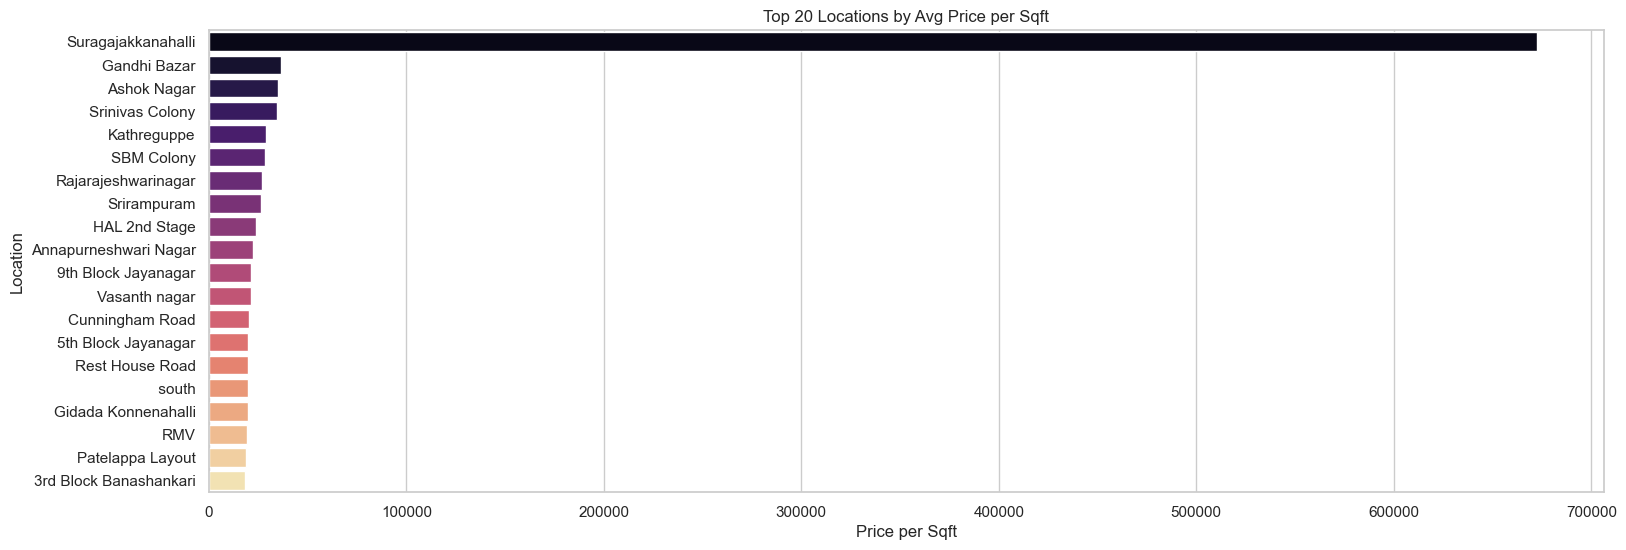

In [21]:
plt.figure(figsize=(18, 6))
location_stats = data.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(20)

sns.barplot(x=location_stats.values, y=location_stats.index, palette='magma')
plt.title('Top 20 Locations by Avg Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Location')
plt.show()


## Visualize BHK vs Price


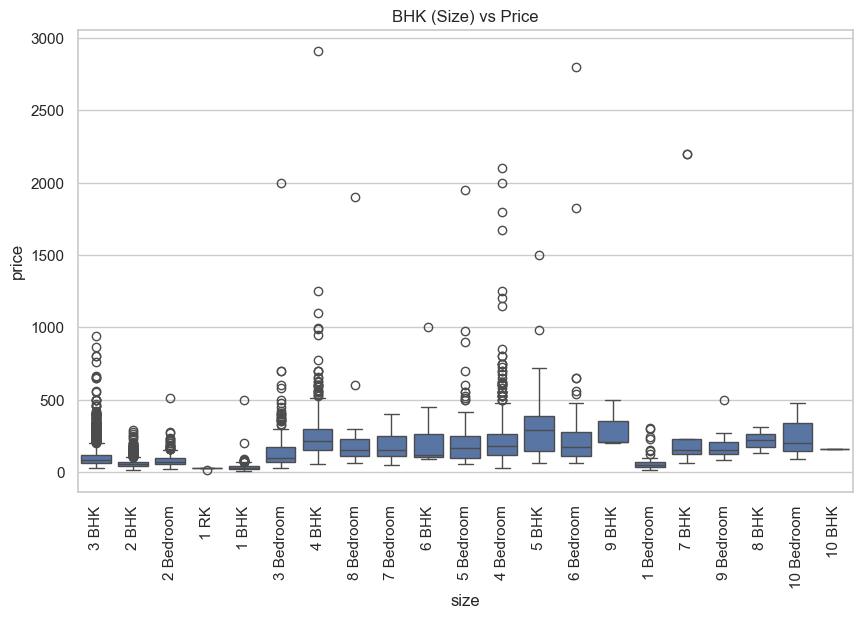

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='price', data=data)
plt.xticks(rotation=90)
plt.title('BHK (Size) vs Price')
plt.show()


## Handle BHK Outliers (Optional but Good)

In [23]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk in location_df['size'].unique():
            bhk_df = location_df[location_df['size'] == bhk]
            bhk_df = bhk_df.dropna()
            mean = bhk_df['price_per_sqft'].mean()
            bhk_stats[bhk] = mean

        for i, row in location_df.iterrows():
            bhk = row['size']
            if bhk in bhk_stats and '2 BHK' in bhk_stats and bhk != '2 BHK':
                if bhk_stats['2 BHK'] > bhk_stats[bhk]:
                    exclude_indices = np.append(exclude_indices, i)

    return df.drop(exclude_indices, axis='index', errors='ignore')

data = bhk_outlier_remover(data)


## Top 20 Expensive Locations (Avg Price/Sqft)

C:\Users\HP\AppData\Local\Temp\ipykernel_16052\1938922683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_stats.values, y=location_stats.index, palette='magma')


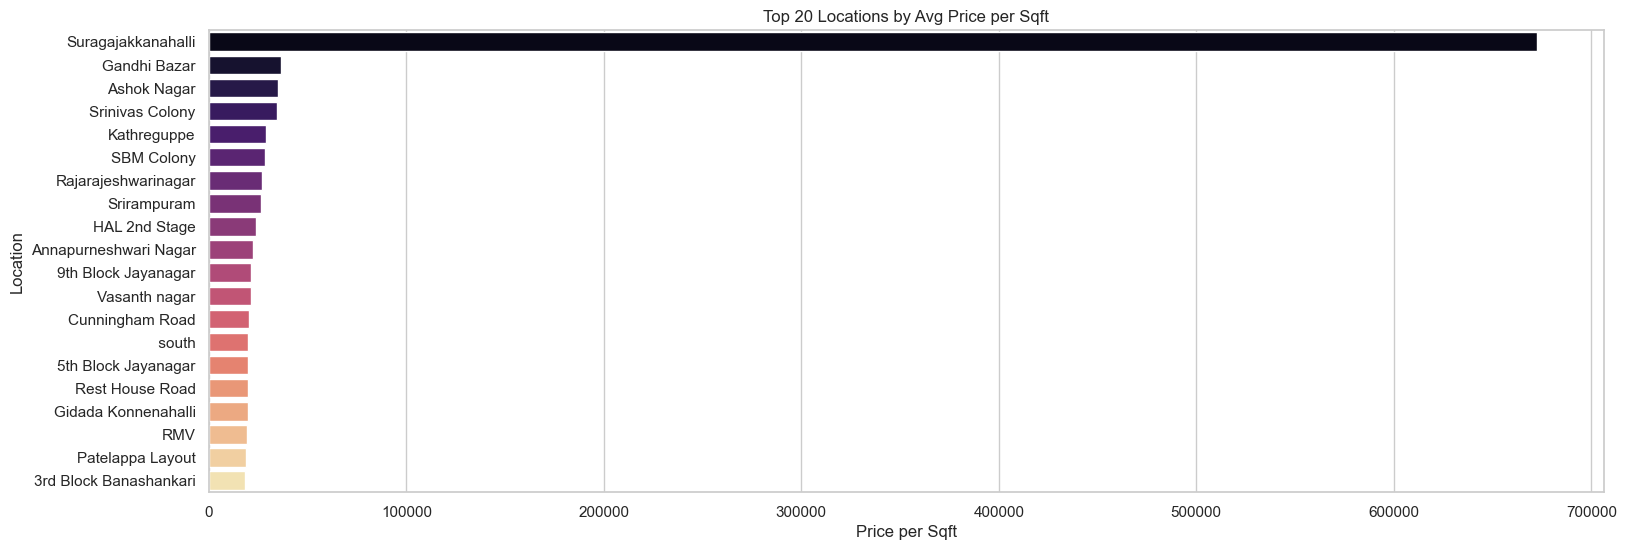

In [24]:
plt.figure(figsize=(18, 6))
location_stats = data.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(20)

sns.barplot(x=location_stats.values, y=location_stats.index, palette='magma')
plt.title('Top 20 Locations by Avg Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Location')
plt.show()


## BHK Distribution – Boxplot

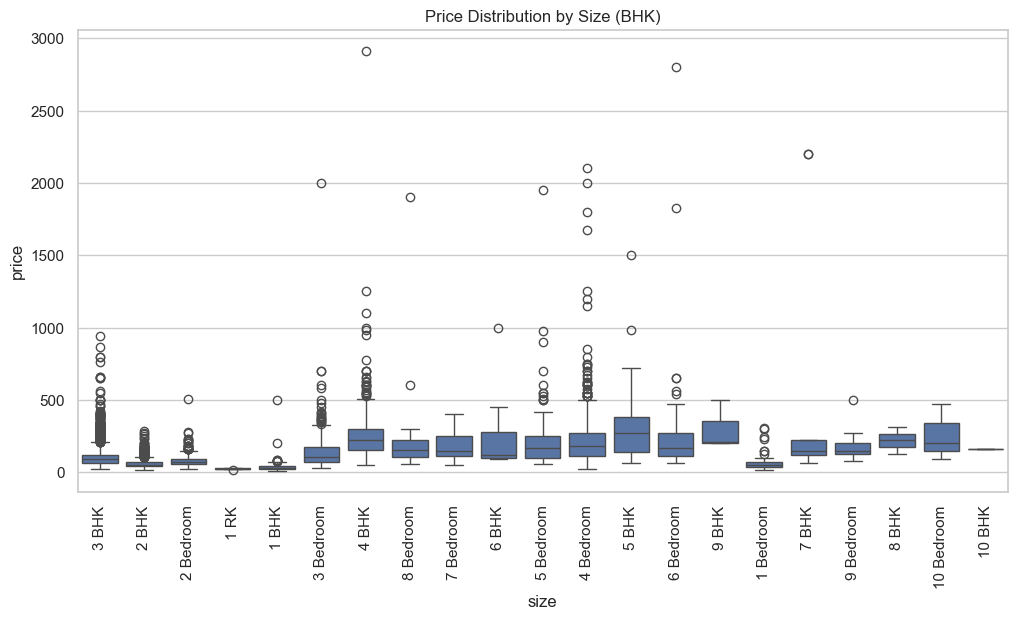

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', y='price', data=data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Size (BHK)')
plt.show()


## Correlation Heatmap

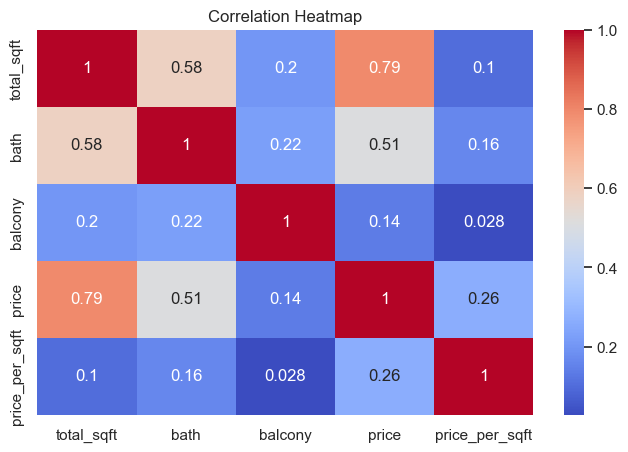

In [27]:
plt.figure(figsize=(8, 5))

# Only keep numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Draw heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Scatter: Sqft vs Price (After Outlier Removal)

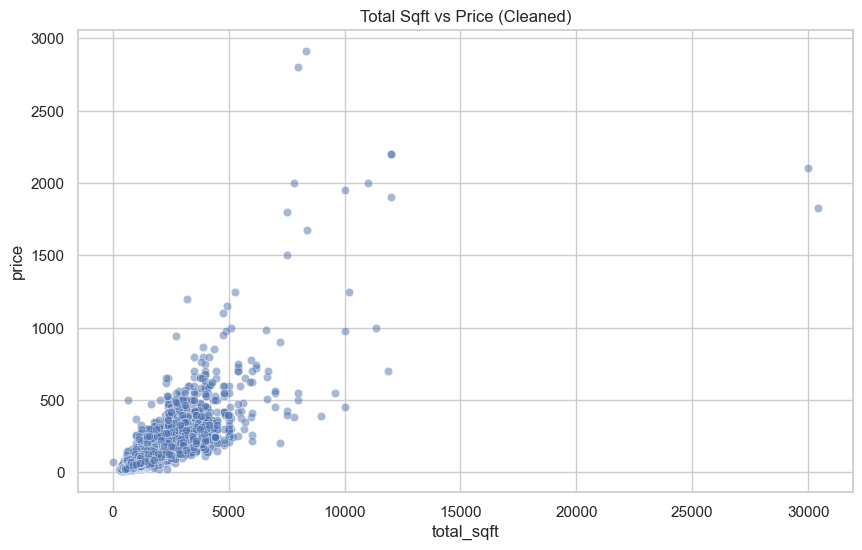

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=data, alpha=0.5)
plt.title('Total Sqft vs Price (Cleaned)')
plt.show()


## Pie Chart: Area Type Distribution

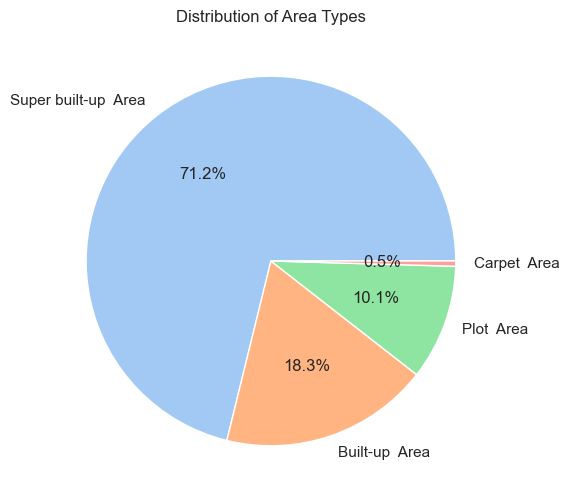

In [29]:
plt.figure(figsize=(6,6))
data['area_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Area Types')
plt.ylabel('')
plt.show()


## Pie Chart – Area Type Distribution

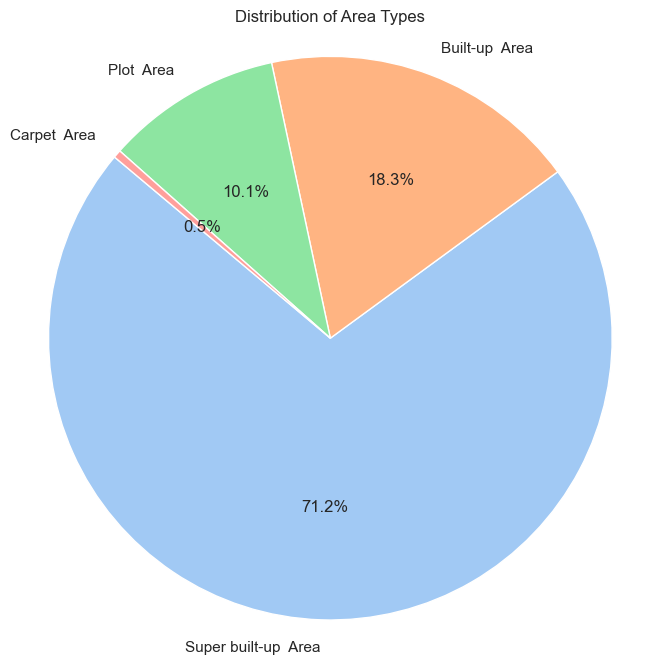

In [30]:
plt.figure(figsize=(8, 8))
area_counts = data['area_type'].value_counts()
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Area Types')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


## Top 10 Locations by Listing Count

C:\Users\HP\AppData\Local\Temp\ipykernel_16052\4137156763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='cubehelix')


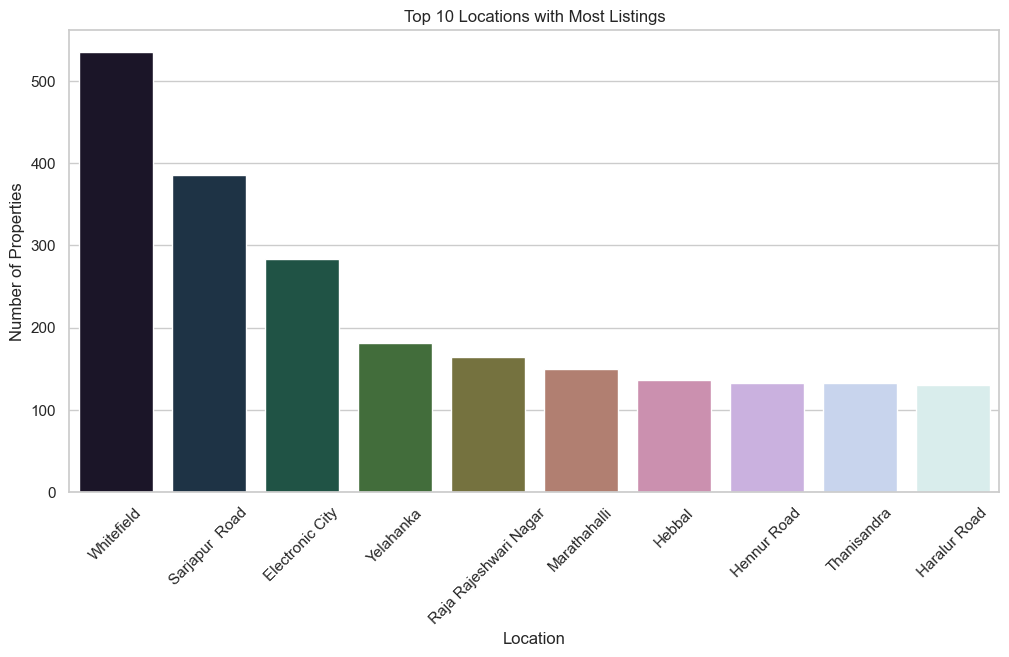

In [32]:
top_locations = data['location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='cubehelix')
plt.title('Top 10 Locations with Most Listings')
plt.xlabel('Location')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()


## Distribution Plot – Price per Square Foot

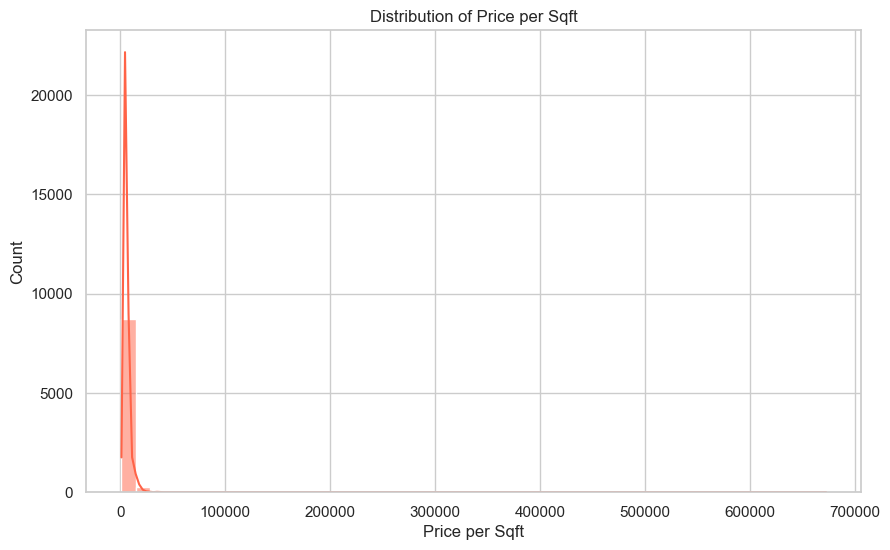

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], bins=50, kde=True, color='tomato')
plt.title('Distribution of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()


## Box Plot – Outlier Check for Price per Sqft

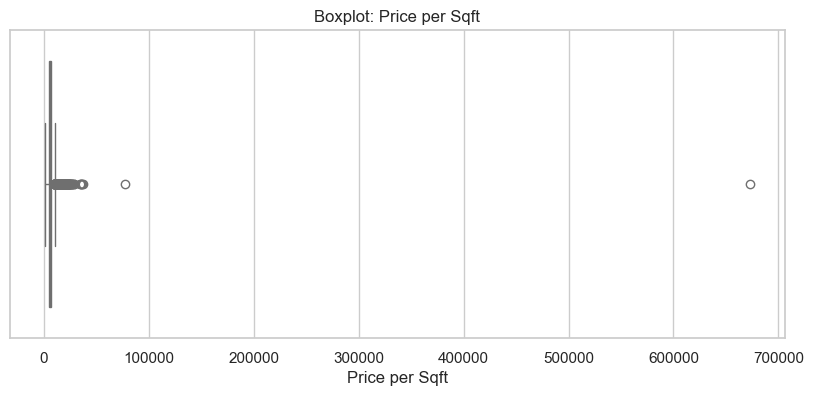

In [34]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['price_per_sqft'], color='skyblue')
plt.title('Boxplot: Price per Sqft')
plt.xlabel('Price per Sqft')
plt.show()
